![En tête general](img/En_tete_general.png)


*(C) Copyright Franck CHEVRIER 2019-2020 http://www.python-lycee.com/*

<span style="color: #9317B4"> Pour exécuter une saisie Python, sélectionner la cellule et valider avec </span><span style="color: #B317B4"><strong>SHIFT+Entrée</strong></span>.


# Réseaux sociaux et graphes

*Le but de l’activité est de modéliser les relations d'un réseau social à l'aide de graphes, et d'introduire les notions de matrice d'adjacence et de diamètre d'un graphe.*


## 1. Relation d'amitié réflexive : Graphe non orienté

![Reseau_social_amities](img/ReseauSocial_1.png)

<span style="color: #7C39C9">__1. a. Des relations d'amitiés au sein d'un réseau social sont présentées ci-dessus. La relation d'amitié considérée est une relation réflexive (réciproque). A l'aide de la vidéo suivante, donner:__</span>

<span style="color: #7C39C9">
<ul style="color: #7C39C9">
    <li><strong>la matrice d'adjacence associée à ce graphe ;</strong></li>
    <li><strong>la distance de C à E ;</strong></li>
    <li><strong>le diamètre de ce graphe.</strong></li>
</ul>


<video controls src="video/Reseau_social.mp4" width="960" height="540" />

<span style="color: #7C39C9">__1. b. On code en Python le graphe précédent à l'aide de la structure <mark>G1</mark> ci-dessous. Expliquer brièvement comment sont stockées les informations du graphe dans <mark>G1</mark>.__</span>


<em style="color:#A9A9A9">Attention : Penser ensuite à exécuter la zone ci-dessous (et les suivantes) avec <strong>SHIFT+Entrée</strong></em>.

In [1]:
G1 = { 'A':['C','F'] , 
       'B':['C','D','E','F'] , 
       'C':['A','B','F'] , 
       'D':['B','E'] , 
       'E':['B','D'] , 
       'F':['A','B','C']  
     }

<span style="color: #7C39C9">__1. c. La fonction Python <mark>repr_graphe</mark> ci-dessous permet de représenter un graphe à partir de sa structure en Python. Tester l'appel à cette fonction pour <mark>G1</mark> et vérifier qu'on obtient bien le graphe initial.__</span>


In [4]:
len(G1)

6

In [2]:
#import des modules pour les calculs et graphiques
from math import*
import numpy as np
import matplotlib.pyplot as plt

def non_oriente(Graphe):
    """
    Fonction qui indique si un graphe n'est pas orienté
    """
    for S in Graphe:
        for adj in Graphe[S]:
            if S not in Graphe[adj]: return False
    return True
    
def repr_graphe(Graphe, r_sommets=0.1):
    """
    Fonction qui représente un graphe stocké sous forme d'un dictionnaire
    (la fonction trace des arêtes orientées si le graphe est orienté)
    """
    #couleurs du graphique
    col_p='black' 
    col_t='white' 
    
    #récupération du nombre de sommets
    n_sommets=len(Graphe)
    
    #préparation du graphique: axes masqués
    fig, ax = plt.subplots() ; axes = plt.gca()
    #for dir in ['left','right','bottom','top']: ax.spines[dir].set_visible(False)
    aff=1+r_sommets*1.1
    plt.xlim(-aff,aff) ; axes.xaxis.set_ticks_position('none') ; axes.xaxis.set_ticklabels([])
    plt.ylim(-aff,aff) ; axes.yaxis.set_ticks_position('none') ; axes.yaxis.set_ticklabels([])
    
    #calcul des coordonnées des sommets:
    x_sommet={} ; y_sommet={}
    k=0
    for S in Graphe:
        angle=2*pi*k/n_sommets
        x_sommet[S]=cos(angle)
        y_sommet[S]=sin(angle)
        k+=1
    
    #tracé des arêtes
    for S in Graphe:
        for adj in Graphe[S]:
            if non_oriente(Graphe):
                #arête simple si le graphe n'est pas orienté
                plt.plot([x_sommet[S],x_sommet[adj]],[y_sommet[S],y_sommet[adj]],color=col_p)
            else:
                #arête orientée sinon
                x_vect=x_sommet[adj]-x_sommet[S] ; y_vect=y_sommet[adj]-y_sommet[S]
                ax.arrow( x_sommet[S] , y_sommet[S] , x_vect*(1-2*r_sommets/sqrt(x_vect**2+y_vect**2)) , y_vect*(1-2*r_sommets/sqrt(x_vect**2+y_vect**2)) , head_width=r_sommets*2/3, head_length=r_sommets, fc=col_p, ec=col_p)
        
    #tracé des sommets
    k=0
    for S in Graphe:
        ax.add_patch(plt.Circle((x_sommet[S],y_sommet[S]), radius=r_sommets , color=col_p )) #disque représentant le sommet
        plt.text(x_sommet[S]-r_sommets/4,y_sommet[S]-r_sommets/4,S, color=col_t) #nom du sommet
        k+=1        
    
    #affichage général
    plt.show()

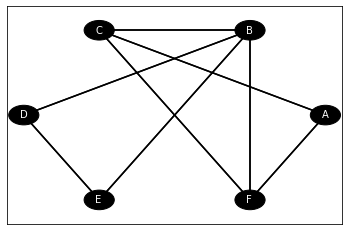

In [4]:
#Appel à la fonction pour le graphe G1
repr_graphe(G1)

<span style="color: #7C39C9">__1. d. Les fonctions Python <mark>mat_adjacence</mark>, <mark>distance</mark> et <mark>diametre</mark> données ci-dessous permettent d'obtenir respectivement la matrice d'adjacence associée à un graphe, la distance entre deux de ses sommets et le diamètre de ce graphe. Effectuer les appels à ces fonctions et vérifier qu'on retrouve les réponses à la question 1.a.__</span> 

In [17]:
#Pour utiliser l'ordre alphabétique
Alphabet='ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def mat_adjacence(Graphe):
    """
    Fonction qui renvoie la matrice d'adjacence d'un graphe (ordre alphabétique) avec liste ordonnée des noms de sommets
    """
    return np.matrix([ [ 1 if sommet_colonne in Graphe[sommet_ligne] else 0 for sommet_colonne in Alphabet if sommet_colonne in Graphe ] for sommet_ligne in Alphabet if sommet_ligne in Graphe ]),[sommet for sommet in Graphe]
    
def distance(Graphe,debut,fin):
    """
    Fonction qui renvoie la distance entre deux sommets
    (renvoie infini par défaut si aucune chaîne n'existe)
    """
    ADJ=mat_adjacence(Graphe)
    M=ADJ[0]
    try: rang_deb=ADJ[1].index(debut) ; rang_fin=ADJ[1].index(fin)
    except: return float('inf')
    
    for k in range(len(Graphe)):
        if (M**k)[rang_deb,rang_fin] > 0: return k
    
    return float('inf')
    
def diametre(Graphe):
    """
    Fonction qui renvoie le diamètre d'un graphe
    """
    return max(distance(Graphe,s1,s2) for s2 in Graphe for s1 in Graphe)


In [18]:
#Appel pour obtenir la matrice d'adjacence associée à G1
mat_adjacence(G1)

(matrix([[0, 0, 1, 0, 0, 1],
         [0, 0, 1, 1, 1, 1],
         [1, 1, 0, 0, 0, 1],
         [0, 1, 0, 0, 1, 0],
         [0, 1, 0, 1, 0, 0],
         [1, 1, 1, 0, 0, 0]]),
 ['A', 'B', 'C', 'D', 'E', 'F'])

In [19]:
#Appel pour obtenir la distance entre C et E
distance(G1,'C','E')

2

In [7]:
#Appel pour obtenir le diamètre du graphe G1
diametre(G1)

3

<span style="color: #7C39C9">__1. e. Le tableau ci-dessous recense des liens d'amitié existant dans un réseau social.__</span> 

![Reseau_social_amities_2](img/ReseauSocial_2.png)

<ul>
<li style="color: #7C39C9"><strong>Réaliser le graphe correspondant à cette nouvelle situation.</strong></li>
</ul>


<ul>
<li style="color: #7C39C9"><strong>Créer une structure Python <mark>G2</mark> correspondant à ce graphe, puis effectuer l'appel à la fonction Python <mark>repr_graphe</mark> permettant de construire le graphe. Vérifier la cohérence avec la réponse précédente.</strong></li>
</ul>

In [8]:
#Créer la structure G2 (structure similaire à G1)
G2 = { 'A':['E','G'] , 
       'B':['C','F'] , 
       'C':['B','D','E','G'] , 
       'D':['C','G'] , 
       'E':['A','C','F'] , 
       'F':['B','E'],
       'G':['A','C','D']
     }

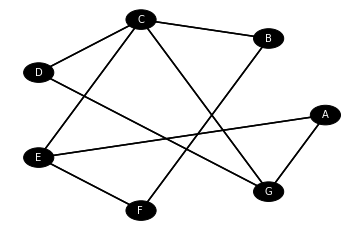

In [9]:
#Effectuer l'appel à la fonction repr_graphe
repr_graphe(G2)

<ul>
<li style="color: #7C39C9"><strong>Déterminer, à la main, la matrice d'adjacence associée à ce graphe et son diamètre, puis vérifier vos résultats à l'aide d'appels aux fonctions Python <mark>mat_adjacence</mark> et <mark>diametre</mark>.</strong></li>
</ul>


In [10]:
#Effectuer l'appel à la fonction mat_adjacence 
mat_adjacence(G2)


(matrix([[0, 0, 0, 0, 1, 0, 1],
         [0, 0, 1, 0, 0, 1, 0],
         [0, 1, 0, 1, 1, 0, 1],
         [0, 0, 1, 0, 0, 0, 1],
         [1, 0, 1, 0, 0, 1, 0],
         [0, 1, 0, 0, 1, 0, 0],
         [1, 0, 1, 1, 0, 0, 0]]),
 ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [11]:
#Effectuer l'appel à la fonction diametre
diametre(G2)

3

## 2. Relation de connaissance non réflexive : Graphe orienté

<span style="color: #7C39C9">__2. a. Certaines relations d'un réseau social ne sont pas réflexives (pas réciproques), c'est le cas par exemple du "Follow" sur Twitter. Le tableau ci-dessous recense des connaissances au sein d'un réseau social. Réaliser le graphe correspondant à cette situation (les arêtes seront orientées, représentées par des flèches), ainsi que la matrice d'adjacence associée.__</span>


![Reseau_social_connaissance](img/ReseauSocial_3.png)

<span style="color: #7C39C9">__2. b. Créer une structure Python <mark>G3</mark> correspondant à ce graphe. Effectuer ensuite l'appel à la fonction Python <mark>repr_graphe</mark> permettant de construire le graphe, puis un appel à la fonction <mark>mat_adjacence</mark>. Pour finir, vérifier la cohérence avec la réponse à la question 2.a.__</span>

In [12]:
#Créer la structure G3 (structure similaire à G1 et G2)
G3 = { 'A':['B','E','F'] , 
       'B':['D'] , 
       'C':['A','G'] , 
       'D':['B','C'] , 
       'E':['D'] , 
       'F':['B','E'],
       'G':['C','D']
     }

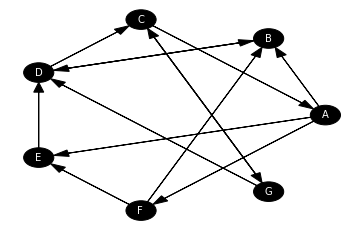

In [13]:
#Effectuer l'appel à la fonction repr_graphe
repr_graphe(G3)

In [15]:
#Effectuer l'appel à la fonction mat_adjacence
mat_adjacence(G3)

(matrix([[0, 1, 0, 0, 1, 1, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 1],
         [0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 1, 0, 0],
         [0, 0, 1, 1, 0, 0, 0]]),
 ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<span style="color: #7C39C9">__2. c. Quelle est la propriété d'une matrice d'adjacence d'un graphe non orienté (partie 1) qu'on ne retrouve pas dans le cas d'un graphe orienté (partie 2) ?__</span>



## 3. Expérience du petit monde de Milgram

<span style="color: #7C39C9">__3. a. La fonction et l'appel Python suivants permettent de générer une structure <mark>G4</mark> correspondant à une situation aléatoire de 20 utilisateurs possédant chacun 5 connaissances vers d'autres utilisateurs (liens non nécessairement réciproques). A l'aide de la fonction Python <mark>repr_graphe</mark>, obtenir la représentation de ce graphe.__</span>

In [20]:
#Pour le choix au hasard des amis
from random import sample

#Pour utiliser l'ordre alphabétique
Alphabet='ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def genere_graphe(n_sommets,n_liens):
    Sommets=Alphabet[:n_sommets]
    return { S:sample( [A for A in Sommets if A!=S] , n_liens ) for S in Sommets }    
           
G4=genere_graphe(20,5)
G4    

{'A': ['Q', 'L', 'B', 'K', 'N'],
 'B': ['L', 'M', 'N', 'Q', 'S'],
 'C': ['L', 'M', 'Q', 'I', 'D'],
 'D': ['K', 'O', 'H', 'J', 'N'],
 'E': ['F', 'S', 'L', 'K', 'M'],
 'F': ['S', 'C', 'J', 'G', 'H'],
 'G': ['E', 'H', 'I', 'N', 'L'],
 'H': ['S', 'N', 'Q', 'C', 'J'],
 'I': ['L', 'H', 'O', 'P', 'E'],
 'J': ['Q', 'T', 'H', 'D', 'M'],
 'K': ['E', 'C', 'L', 'T', 'D'],
 'L': ['K', 'E', 'F', 'D', 'Q'],
 'M': ['D', 'F', 'P', 'K', 'G'],
 'N': ['J', 'F', 'R', 'C', 'B'],
 'O': ['Q', 'J', 'D', 'B', 'H'],
 'P': ['G', 'T', 'E', 'C', 'D'],
 'Q': ['T', 'S', 'M', 'N', 'I'],
 'R': ['D', 'I', 'E', 'G', 'O'],
 'S': ['M', 'K', 'Q', 'O', 'J'],
 'T': ['L', 'K', 'O', 'N', 'S']}

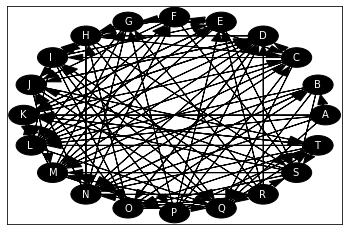

In [21]:
# Effectuer l'appel à la fonction repr_graphe
repr_graphe(G4)

<span style="color: #7C39C9">__3. b. Effectuer un appel à la fonction Python <mark>diametre</mark> pour ce graphe. Si on choisit deux utilisateurs au hasard, combien d'intermédiaires seront nécessaires pour former une chaîne de connaissances qui les relie?__</span>

In [22]:
#Effectuer l'appel à la fonction diametre
diametre(G4)

inf

<span style="color: #7C39C9">__3. c. Relancer les zones Python des questions 3.a et 3.b pour simuler d'autres situations de 20 utilisateurs ayant 5 liens de connaissances, et comparer les résultats obtenus à la question 3.b.__</span>


__Synthèse:__


L'<a href="https://fr.wikipedia.org/wiki/%C3%89tude_du_petit_monde"><strong>expérience du petit monde de Milgram</strong></a> est une hypothèse selon laquelle même si des personnes sont très nombreuses et ont un nombre assez limité de connaissances, le nombre de liens nécessaires pour former une chaîne entre deux personnes quelconques sera faible.


![Stanley_Milgram](img/Milgram.png)

<center><a href="https://fr.wikipedia.org/wiki/Stanley_Milgram">Stanley Milgram</a>, psychologue social américain</center>


*(C) Copyright Franck CHEVRIER 2019-2020 http://www.python-lycee.com/*
